In [3]:
#import re
import pandas as pd
pd.read_csv("chat.txt",on_bad_lines='skip')

,[25/06/19,8:18:31 AM] TEAM TECHOLAS: ‎Messages and calls are end-to-end encrypted. No one outside of this chat,not even WhatsApp,can read or listen to them.
0,[25/06/19,8:18:31 AM] Mithun Sir Techolas MD: ‎Mithun S...,NaN,NaN
1,[13/10/23,6:59:41 PM] TEAM TECHOLAS: ‎Mithun Sir Techol...,NaN,NaN
2,[13/10/23,7:06:49 PM] Mephy Techolas Trainer: Work update,NaN,NaN
3,9-11 completed,NaN,NaN,NaN
4,[13/10/23,7:15:02 PM] Keerthana Staff Techolas: Hi all,NaN,NaN
...,...,...,...,...
12027,[28/02/24,6:17:36 PM] anjanaalex Techolas Trainer: Comp...,NaN,NaN
12028,9-1 (2/2),NaN,NaN,NaN
12029,‎[28/02/24,7:28:02 PM] Musfir Techolas: ‎image omitted,NaN,NaN
12030,[28/02/24,8:25:09 PM] Akshay Techolas Tutor: Completed,NaN,NaN


In [6]:
f=open("chat.txt","r",encoding="utf_8")

In [7]:
data=f.read()

In [8]:
#print(data)

In [9]:
lines = data.strip().split('\n')

In [10]:
dat = {'date': [], 'sender': [], 'message': []}

In [11]:
for line in lines:
    if line.startswith('['):
        split_line = line.split('] ', 1)
        if len(split_line) == 2:
            current_date, rest_of_line = split_line
            sender_parts = rest_of_line.split(':', 1)
            if len(sender_parts) == 2:
                current_sender = sender_parts[0].strip()
                current_message = sender_parts[1].strip()
                current_date = pd.to_datetime(current_date[1:], errors='coerce', utc=True)
            else:
                current_sender = None
                current_message = rest_of_line.strip()
                current_date = pd.to_datetime(current_date[1:], errors='coerce', utc=True)
    else:
        if current_date is not None and current_sender is not None:
            dat['date'].append(current_date)
            dat['sender'].append(current_sender)
            dat['message'].append(current_message if current_message else line.strip())

df = pd.DataFrame(dat)

In [12]:
df = pd.DataFrame(dat)

In [13]:
#df['date'] = pd.to_datetime(df['date'])
df.dtypes

date       datetime64[ns, UTC]
sender                  object
message                 object
dtype: object

In [14]:
df

,date,sender,message
0,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update
1,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update
2,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update
3,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,"
4,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,"
...,...,...,...
9568,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed
9569,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed
9570,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed
9571,2024-02-28 18:17:36+00:00,anjanaalex Techolas Trainer,Completed


In [15]:

df['date'] = pd.to_datetime(df['date'], format='[%d/%m/%y, %I:%M:%S %p', errors='coerce')


In [16]:
df.dtypes

date       datetime64[ns, UTC]
sender                  object
message                 object
dtype: object

In [17]:
df["year"] = df["date"].dt.year

In [18]:
df["day"] = df["date"].dt.day

In [19]:
df["hour"] = df["date"].dt.hour

In [20]:
df["month"] = df["date"].dt.month

In [21]:
df["minute"] = df["date"].dt.minute

In [22]:
df

,date,sender,message,year,day,hour,month,minute
0,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6
1,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6
2,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6
3,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15
4,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15
...,...,...,...,...,...,...,...,...
9568,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15
9569,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15
9570,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15
9571,2024-02-28 18:17:36+00:00,anjanaalex Techolas Trainer,Completed,2024,28,18,2,17


In [23]:
import pickle 
pickle.dump(df,open('Model','wb'))

In [24]:
#full_messages

In [25]:
df["sender"].unique()

array(['Mephy Techolas Trainer', 'Keerthana Staff Techolas',
       'Kavya Tutor Techolas', 'Sulfath Techolas Trainer',
       '~\u202fAnjali B', '~\u202fSilpa Sivadas',
       'Shifana Techolas Trainer', 'Rajina Nisar', 'Hafi🖤 Techolas',
       'Saara Techolas Trainer', 'Musfir Techolas Office',
       '~\u202fSyamily Anilkumar', 'anjanaalex Techolas Trainer',
       'Nabban Techolas Tutor', 'Shefiya Techolas Hr',
       'Dilsha Techolas Tutor', 'Musfir Techolas',
       'Sarunkumar Techolas Trainer', 'Mithun Sir Techolas MD',
       'Safeeq Techolas Digital Marketing', 'Shilpa Techolas HR',
       'Techolas Technologiee', 'Vishnu Sir Techolas',
       '~\u202fSankar Rajesh', 'keerthana Techolas Tutor',
       'Akshay Techolas Tutor', '~\u202fHR Techolas Technologies',
       '~\u202fRohith Rajan', '~\u202fTecholas Technology',
       'Mithun Sir Techolas(N)',
       '~  2/01/ithun Sir Techolas(N) added ~  s Trainer',
       '~  2/01//01/24, 8', 'Shain Techolas Trainer',
       'Shifa

In [26]:
df.shape

(9573, 8)

In [27]:
df[df["sender"]=="Mephy Techolas Trainer"].shape

(464, 8)

In [28]:
words=[]
for message in df["message"]:
    words.extend(message.split())

In [29]:
len(words)

19406

In [30]:
df["message"].unique()

array(['Work update', 'Hi all,', 'Work plan', 'Bakhi', 'Completed',
       'Work updates', '9-11 excel 6/12',
       '\u200eThis message was deleted.', 'Hi Team,', '9-11 excel 8/12',
       'Workplan', 'Work Plan', 'work plan', 'Work Update', 'Update',
       'Work completed', 'Thankyou all for you love..❣️', 'all the best',
       'WORK PLAN', 'Good morning Team,', 'Okay',
       'Trainers Eth students group il edanatto enn thanne',
       '9-11 powerbi 10/12', '9-11 tableau 8/12', 'work update',
       '9:30 - 1 mini project presentation',
       'Iam taking half day leave on today', 'Techolas technologies',
       'NOTE:', '_Work plan_', '9-11 statistics 5/12',
       '9-11 statistics 6/12', 'WORK UPDATE', '9-11 statistics 7/12',
       '9-11 statistics 6/11', 'I am on leave today', '9-11 python 2/2',
       '9-11 spot test', 'Dear Team,', 'Happy Diwaliiii💥',
       'Iam on leave 2 days', 'You can send the leave request to my mail',
       'I am leave today', 'Iam half day leave tod

In [31]:
import matplotlib.pyplot as plt

In [32]:
x=df["sender"].value_counts().head()
x

sender
~ Silpa Sivadas             903
Rajina Nisar                876
Shifana Techolas Trainer    870
Kavya Tutor Techolas        728
Hafi🖤 Techolas              681
Name: count, dtype: int64

In [33]:
name=x.index
count=x.values


C:\Users\Rajina Nisar\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


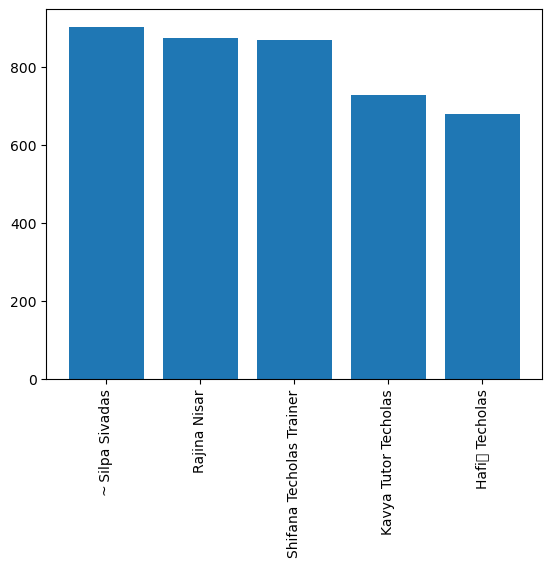

In [34]:
plt.bar(name,count)
plt.xticks(rotation="vertical")
plt.show()

In [35]:
round((df["sender"].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"sender":"name","count":"percent"})

,name,percent
0,~ Silpa Sivadas,9.43
1,Rajina Nisar,9.15
2,Shifana Techolas Trainer,9.09
3,Kavya Tutor Techolas,7.60
4,Hafi🖤 Techolas,7.11
5,Sulfath Techolas Trainer,6.73
6,~ Anjali B,4.94
7,Mephy Techolas Trainer,4.85
8,Dilsha Techolas Tutor,4.40
9,anjanaalex Techolas Trainer,4.25


In [36]:
df[df["message"]=="I am on leave today"].shape[0]

14

In [37]:
df["month_num"]=df["date"].dt.month

In [38]:
df["month_num"]

0       10
1       10
2       10
3       10
4       10
        ..
9568     2
9569     2
9570     2
9571     2
9572     2
Name: month_num, Length: 9573, dtype: int32

In [39]:
df

,date,sender,message,year,day,hour,month,minute,month_num
0,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10
1,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10
2,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10
3,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10
4,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10
...,...,...,...,...,...,...,...,...,...
9568,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2
9569,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2
9570,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2
9571,2024-02-28 18:17:36+00:00,anjanaalex Techolas Trainer,Completed,2024,28,18,2,17,2


In [40]:
timeline=df.groupby(["year","month_num"]).count()["message"].reset_index()
timeline

,year,month_num,message
0,2023,1,193
1,2023,2,151
2,2023,3,111
3,2023,4,165
4,2023,5,98
5,2023,6,197
6,2023,7,159
7,2023,8,204
8,2023,9,155
9,2023,10,1504


In [41]:
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Adding a new column "month_name" based on the "month_num" column
timeline['month'] = timeline['month_num'].map(month_names)

In [42]:
timeline

,year,month_num,message,month
0,2023,1,193,January
1,2023,2,151,February
2,2023,3,111,March
3,2023,4,165,April
4,2023,5,98,May
5,2023,6,197,June
6,2023,7,159,July
7,2023,8,204,August
8,2023,9,155,September
9,2023,10,1504,October


In [43]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline["month"][i] + "-" + str(timeline["year"][i]))

In [44]:
timeline["time"]=time

In [45]:
timeline

,year,month_num,message,month,time
0,2023,1,193,January,January-2023
1,2023,2,151,February,February-2023
2,2023,3,111,March,March-2023
3,2023,4,165,April,April-2023
4,2023,5,98,May,May-2023
5,2023,6,197,June,June-2023
6,2023,7,159,July,July-2023
7,2023,8,204,August,August-2023
8,2023,9,155,September,September-2023
9,2023,10,1504,October,October-2023


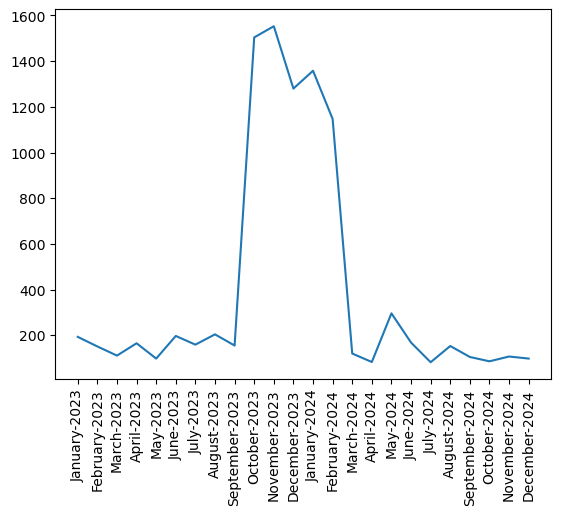

In [46]:
plt.plot(timeline["time"],timeline["message"])
plt.xticks(rotation="vertical")
plt.show()

In [47]:
df["only_date"]=df["date"].dt.date
df

,date,sender,message,year,day,hour,month,minute,month_num,only_date
0,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13
1,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13
2,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13
3,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10,2023-10-13
4,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10,2023-10-13
...,...,...,...,...,...,...,...,...,...,...
9568,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2,2024-02-28
9569,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2,2024-02-28
9570,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2,2024-02-28
9571,2024-02-28 18:17:36+00:00,anjanaalex Techolas Trainer,Completed,2024,28,18,2,17,2,2024-02-28


In [48]:
#df.groupby(["year","month_num"]).count()["message"].reset_index()
daily_timeline=df.groupby(["only_date"]).count()["message"].reset_index()
daily_timeline

,only_date,message
0,2023-01-11,102
1,2023-01-12,91
2,2023-02-11,110
3,2023-02-12,41
4,2023-03-11,111
...,...,...
110,2024-10-01,78
111,2024-10-02,8
112,2024-11-01,107
113,2024-12-01,54


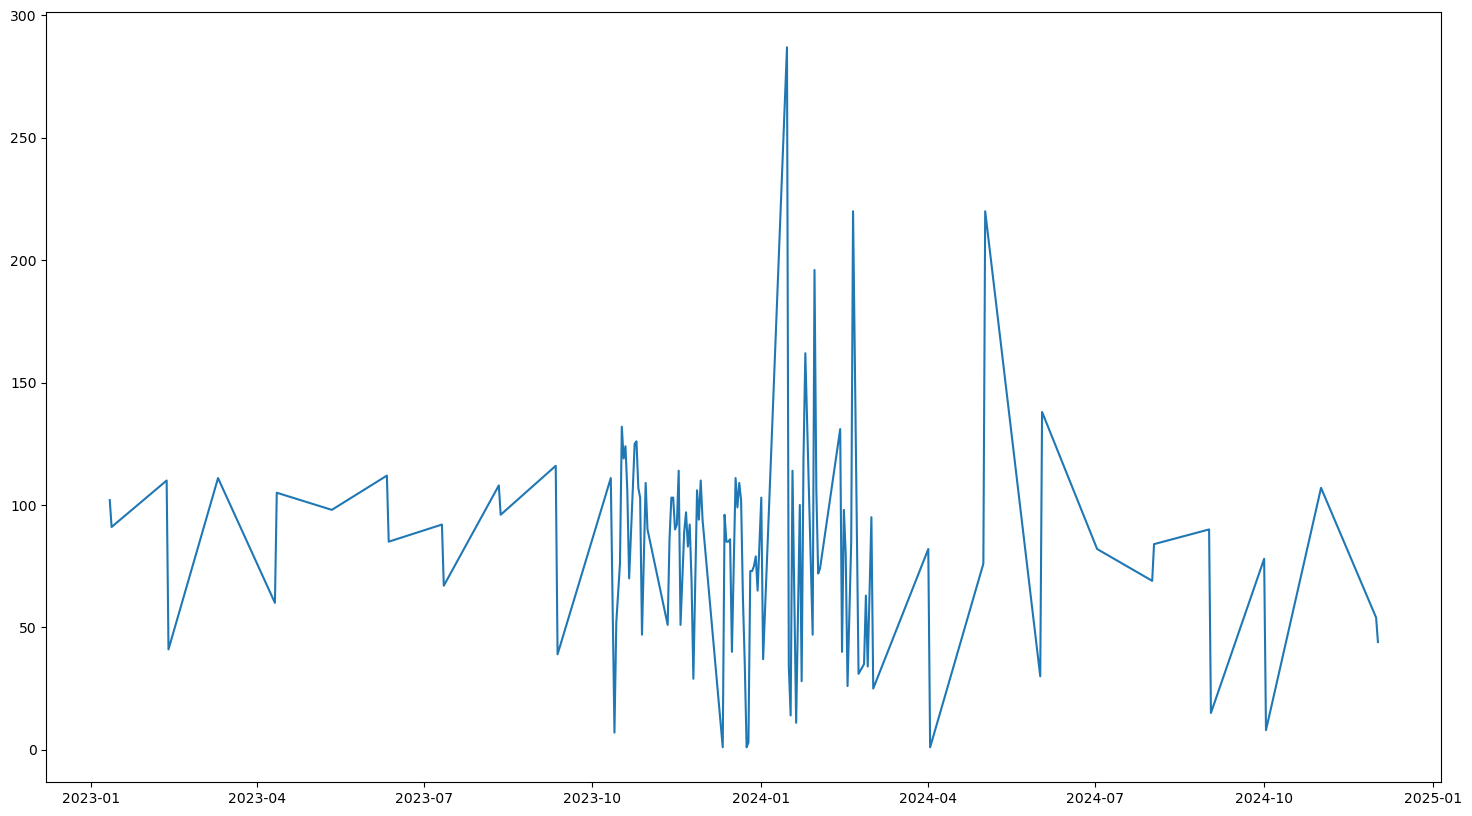

In [49]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline["only_date"],daily_timeline["message"])

In [50]:
df.head()

,date,sender,message,year,day,hour,month,minute,month_num,only_date
0,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13
1,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13
2,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13
3,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10,2023-10-13
4,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10,2023-10-13


In [51]:
df["day_name"]=df["date"].dt.day_name()

In [52]:
df["day_name"].value_counts()

day_name
Tuesday      1970
Wednesday    1735
Monday       1597
Thursday     1597
Friday       1303
Saturday      849
Sunday        522
Name: count, dtype: int64

In [53]:
df["month_name"]=df["date"].dt.month_name()

In [54]:
df["month_name"].value_counts()

month_name
November     1660
October      1590
January      1551
December     1378
February     1298
May           394
June          365
August        357
September     260
April         248
July          241
March         231
Name: count, dtype: int64

In [55]:
period=[]
for hour in df[["day_name","hour"]]["hour"]:
    if hour==23:
        period.append(str(hour)+"-"+str("00"))
    elif hour==0:
        period.append(str("00")+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [56]:
df["period"]=period

In [57]:
df

,date,sender,message,year,day,hour,month,minute,month_num,only_date,day_name,month_name,period
0,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13,Friday,October,19-20
1,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13,Friday,October,19-20
2,2023-10-13 19:06:49+00:00,Mephy Techolas Trainer,Work update,2023,13,19,10,6,10,2023-10-13,Friday,October,19-20
3,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10,2023-10-13,Friday,October,19-20
4,2023-10-13 19:15:02+00:00,Keerthana Staff Techolas,"Hi all,",2023,13,19,10,15,10,2023-10-13,Friday,October,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2,2024-02-28,Wednesday,February,17-18
9569,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2,2024-02-28,Wednesday,February,17-18
9570,2024-02-28 17:15:27+00:00,Shain Techolas Trainer,Work completed,2024,28,17,2,15,2,2024-02-28,Wednesday,February,17-18
9571,2024-02-28 18:17:36+00:00,anjanaalex Techolas Trainer,Completed,2024,28,18,2,17,2,2024-02-28,Wednesday,February,18-19


In [60]:
df.pivot_table(index="day_name",columns="period",values="message",aggfunc="count").fillna(0)

period,00-1,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-00,5-6,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,
Friday,0.0,52.0,24.0,1.0,6.0,1.0,0.0,68.0,347.0,45.0,19.0,10.0,27.0,3.0,0.0,0.0,0.0,46.0,654.0
Monday,2.0,65.0,4.0,2.0,4.0,27.0,1.0,54.0,416.0,62.0,16.0,5.0,38.0,2.0,5.0,2.0,6.0,35.0,851.0
Saturday,0.0,89.0,11.0,12.0,1.0,5.0,5.0,74.0,61.0,22.0,0.0,18.0,5.0,0.0,0.0,0.0,3.0,6.0,537.0
Sunday,0.0,39.0,4.0,1.0,1.0,1.0,0.0,11.0,84.0,55.0,13.0,0.0,4.0,0.0,0.0,0.0,0.0,85.0,224.0
Thursday,0.0,47.0,5.0,6.0,10.0,7.0,5.0,90.0,447.0,58.0,24.0,3.0,35.0,0.0,0.0,0.0,0.0,47.0,813.0
Tuesday,0.0,78.0,3.0,19.0,9.0,5.0,1.0,81.0,633.0,59.0,52.0,122.0,119.0,0.0,0.0,0.0,1.0,47.0,741.0
Wednesday,0.0,24.0,36.0,2.0,4.0,0.0,6.0,69.0,509.0,80.0,50.0,11.0,13.0,0.0,0.0,0.0,0.0,39.0,892.0


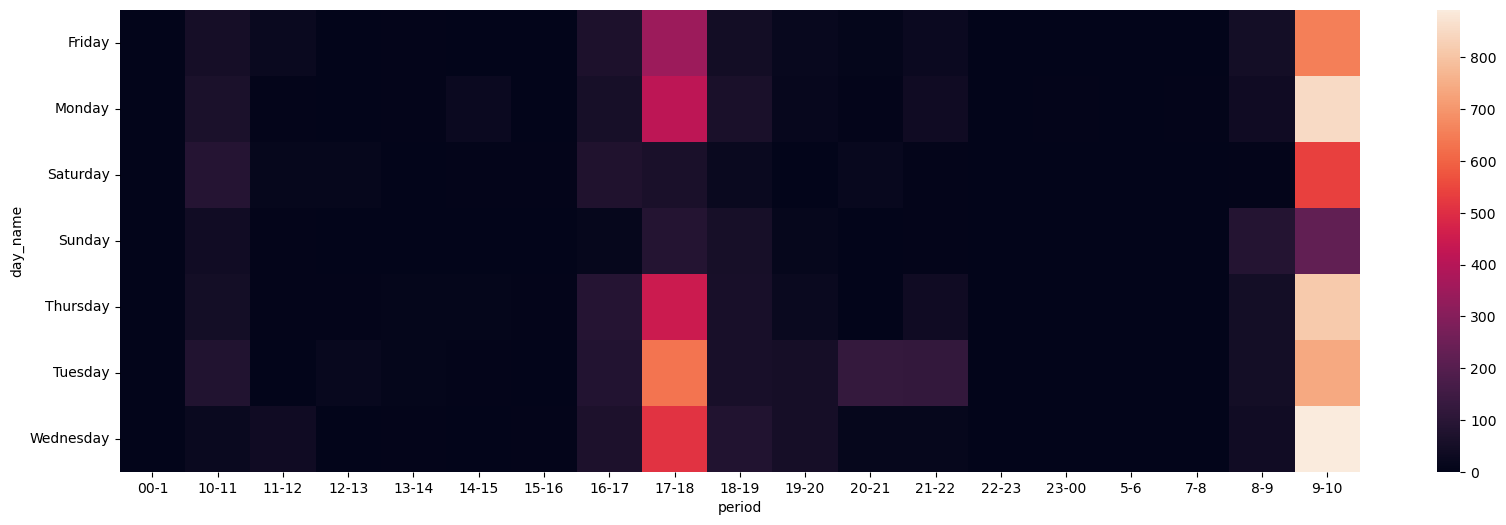

In [59]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index="day_name",columns="period",values="message",aggfunc="count").fillna(0))
plt.yticks(rotation="horizontal")
plt.show()